Sampling and parsing complete 

I am now building the graph for article at index 0
I am now building the graph for article at index 1
I am now building the graph for article at index 2
I am now building the graph for article at index 3
I am now building the graph for article at index 4
I am now building the graph for article at index 5
I am now building the graph for article at index 6
I am now building the graph for article at index 7
I am now building the graph for article at index 8
I am now building the graph for article at index 9
I am now building the graph for article at index 10
I am now building the graph for article at index 11
I am now building the graph for article at index 12
I am now building the graph for article at index 13
I am now building the graph for article at index 14
I am now building the graph for article at index 15
I am now building the graph for article at index 16
I am now building the graph for article at index 17


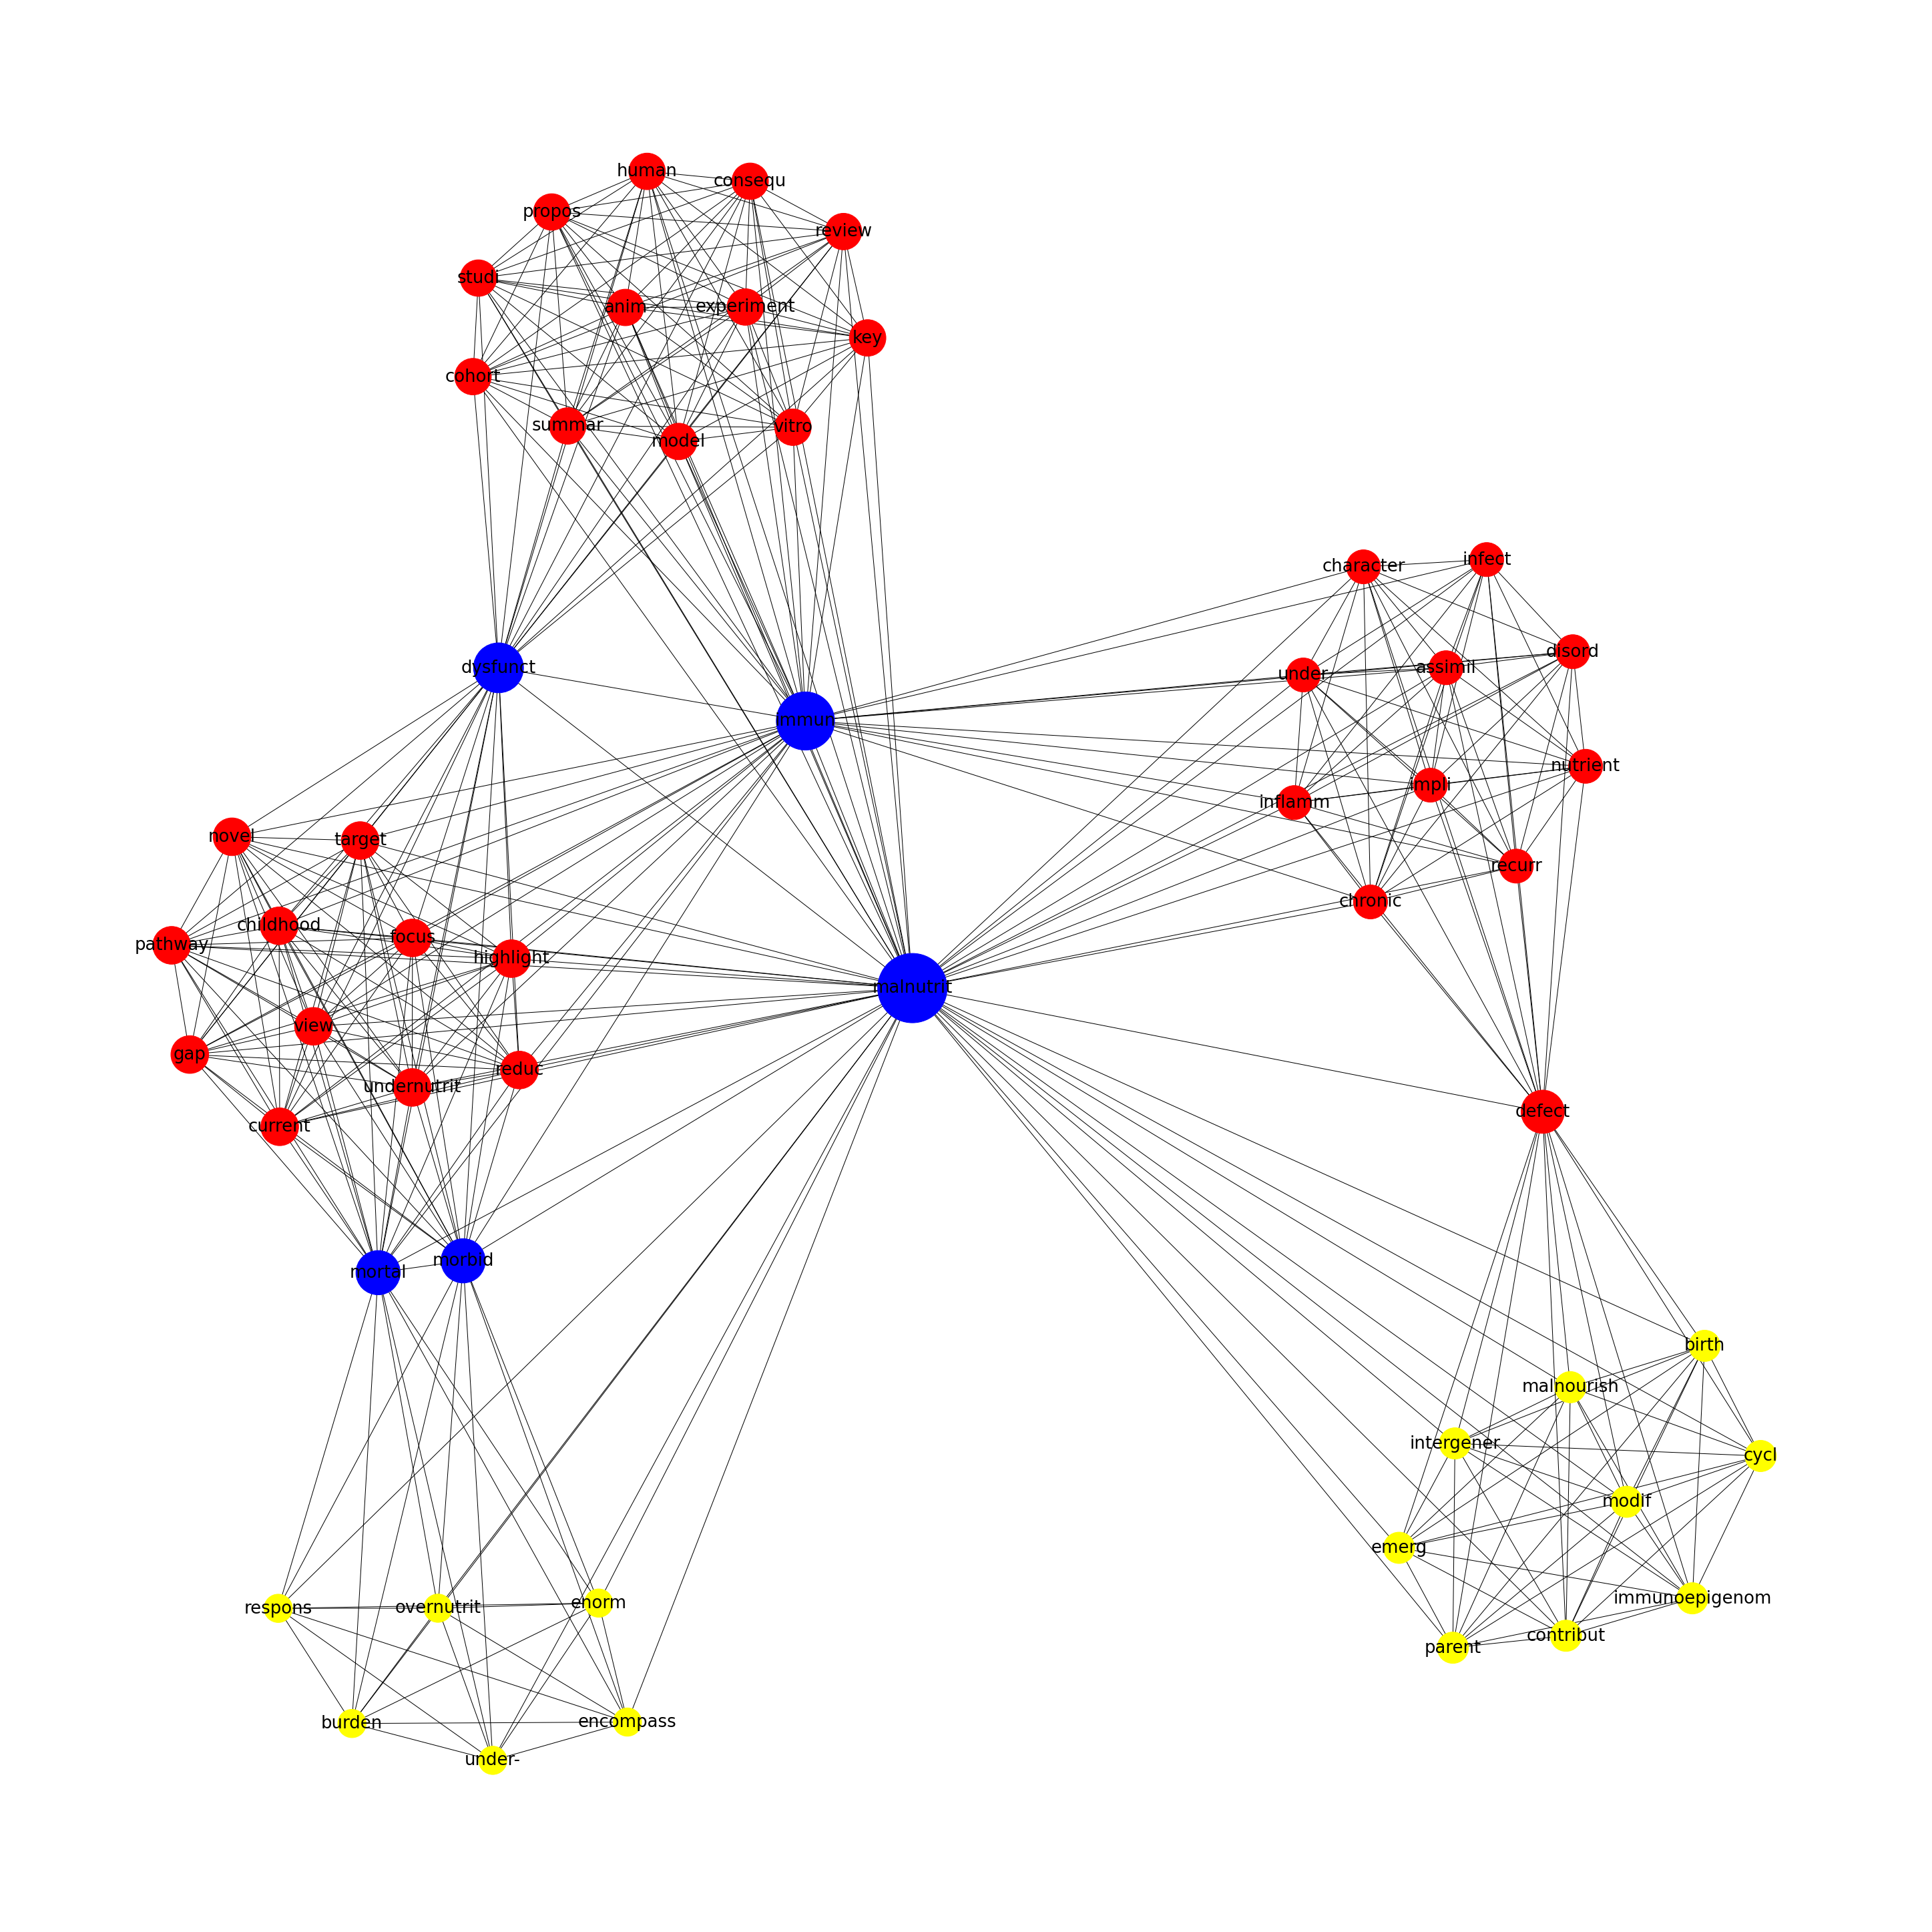

In [3]:
import graph_utils
import networkx as nx
import parse_utils
import numpy as np
import warnings

warnings.filterwarnings("ignore")

#sampling articles in json format and creating a list of Article objects

parsed_articles = parse_utils.parse_and_sample("..\json\json", 18)

print("Sampling and parsing complete \n")

#creating a GraphMaker object that encapsulates the chosen stemmer and stopwords list

gm = graph_utils.GraphMaker('resources\longStopwords.txt','SNO')

# setting up a proper nx.Graph() as Article's co-occurrence graph 

for i in range(0, len(parsed_articles)):
    print("I am now building the graph for article at index "+ str(i))
    parsed_articles[i].graph = gm.buildGraph(parsed_articles[i].abstract, parsed_articles[i].filename)


#If one wanted to print a graph, given an article:

graph_utils.printGraph(parsed_articles[15].graph)



In [ ]:

# computing our approximate centralities and setting the centrality values as attributes for the nodes

for a in parsed_articles:

    myDictionary = graph_utils.approximateClosenessCentrality(a.graph, 10)
    nx.set_node_attributes(a.graph, myDictionary, name = 'apprCC')

    nx.set_node_attributes(a.graph, graph_utils.localPageRankApprox(a.graph), name = 'apprPR')

    nx.set_node_attributes(a.graph, graph_utils.improvedEstimateLCC(a.graph,  0.7), name='apprLCC')




In [2]:
print(parsed_articles[4].abstract)

Binary nitrides multilayer systems were grown on silicon (100) substrates with the aim to study the coherent assembly in HfN/VN material. Multilayers films were grown via reactive r.f. magnetron sputtering technique by systematically varying the bilayer period (Λ) and the bilayer number (n) while maintaining constant the total coating thickness (~2.4 μm). The layers were characterized by high angle X-ray diffraction (HA-XRD) low angle X-ray diffraction (LA-XRD). HfN and VN layers were analyzed by X-ray photoelectron spectroscopy (XPS) and electron and transmission microscopy (TEM). HA-XRD results showed preferential growth in the face-centered cubic (111) crystal structure for HfN/VN multilayer systems with the epitaxial relation (111) [100]HfN//(200) [100]VN. The maximum coherent assembly was observed with presence of satellite peaks. With this idea ternary and binary nitrides films have been designed and deposited on Si (100) substrates with bilayer periods (Λ) in a broad range from 

In [ ]:
#print(parsed_articles[6].abstract)
import graph_utils
gm = graph_utils.GraphMaker('resources\longStopwords.txt','SNO')

ggraph =gm.buildGraph("This data article presents the experimental evidences of the effect of TiO2-fluorine doped tin oxide interface annealing and Ni(OH)2 cocatalysts on the photoelectrochemical  structural  morphological and optical properties of Ni(OH)2/CdS/ZnIn2S4/TiO2 heterojunction. The Raman spectroscopy exhibits the sharp features of the rutile phase of TiO2 and in agreement with the X-ray diffraction data. The band gap energy of the 500 °C sample was found to be 3.12 eV  further it was increased to 3.20  3.22 eV for samples annealed at 600 and 700 °C respectively. The decrease in the band gap energy at 500 °C related to the oxygen vacancies and was analysed by photoluminescence spectroscopy analysis. The synthesis  characterization methods and other experimental details of TiO2 based heterostructure are also provided. The presence of CdS and ZnIn2S4 coating on surface of TiO2 electrodes providing a high surface area  extended visible absorption and helps to improve the change separation. This data article contains data related to the research article entitled “Highly efficient and stable 3D Ni(OH)2/CdS/ZnIn2S4/TiO2 heterojunction under solar light: Effect of an improved TiO2/FTO interface and cocatalyst” (Mahadik et al.  2017) [1]")

graph_utils.printGraph(ggraph)

In [ ]:
myDictionary= nx.pagerank(ggraph,0.4)
print(myDictionary)